In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
df = pd.read_csv("data/TrainAndValid.csv")

C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

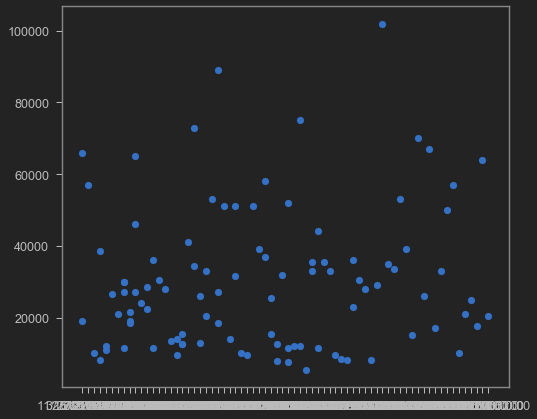

In [6]:
fig, ax = plt.subplots()

ax.scatter(df.saledate[:100], df.SalePrice[:100])

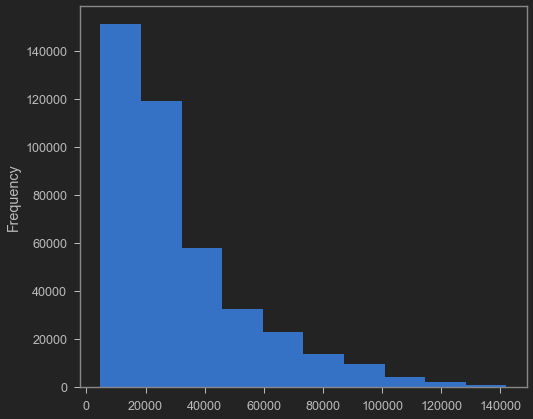

In [7]:
df["SalePrice"].plot.hist()

In [8]:
df = pd.read_csv("data/TrainAndValid.csv",
                parse_dates=["saledate"])

C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
np.dtype(df["saledate"])

dtype('<M8[ns]')

In [11]:
df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

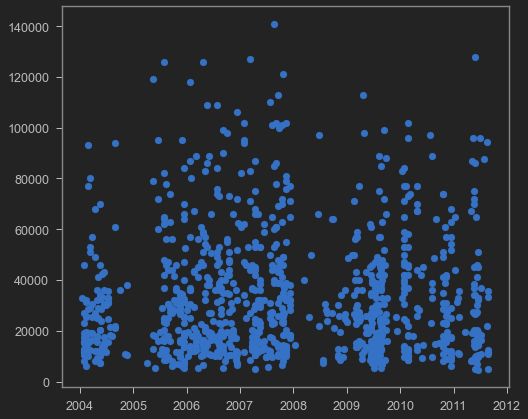

In [12]:
fig, ax = plt.subplots()

ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [15]:
df_temp = df.copy()

In [16]:
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [17]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,saleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,1,31


In [18]:
df_temp.drop("saledate", axis=1, inplace=True)

In [19]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [20]:
len(df_temp)

412698

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [23]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [24]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [25]:
pd.api.types.is_string_dtype(df["ProductSize"])

True

In [26]:
for label, columns in df_temp.items():
    if pd.api.types.is_string_dtype(columns):
        df_temp[label] = columns.astype("category").cat.as_ordered()

In [27]:
df_temp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [28]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [30]:
df_temp.isnull().sum() / len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [31]:
df_temp.to_csv("data/train_tmp.csv",
              index=False)

In [32]:
df_temp = pd.read_csv("data/train_tmp.csv")

C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [34]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [35]:
for label, columns in df_temp.items():
    if pd.api.types.is_numeric_dtype(columns):
        if pd.isnull(columns).sum():
            df_temp[label + "_is_missing"] = pd.isnull(columns)
            
            df_temp[label] = columns.fillna(columns.median())

In [36]:
for label, columns in df_temp.items():
    if not pd.api.types.is_numeric_dtype(columns):
        df_temp[label + "_is_missing"] = pd.isnull(columns)
        
        df_temp[label] = pd.Categorical(columns).codes + 1

In [ ]:
df_temp.info()

In [ ]:
df_temp.head()

In [ ]:
df_temp.isna().sum()

In [37]:
%%time

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

Wall time: 3min 46s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875731878916304

In [40]:
df_val = df_temp[df_temp["SaleYear"] == 2012]

df_train = df_temp[df_temp["SaleYear"] != 2012]

In [41]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [48]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_true, y_preds):
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    
    valid_preds = model.predict(X_val)
    
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, valid_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, valid_preds) }
    return scores

In [59]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [61]:
%%time

model.fit(X_train, y_train)

Wall time: 8.45 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [62]:
show_scores(model)

{'Training MAE': 5513.78438711125,
 'Valid MAE': 7126.771562256977,
 'Training RMSLE': 0.2558387422462573,
 'Valid RMSLE': 0.291248860896783,
 'Training R^2': 0.8627210271464711,
 'Valid R^2': 0.8337407675023158}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {"criterion": ["mse", "mae"],
            "max_depth": np.arange(10, 100 , 10),
            "min_samples_split": np.arange(10, 50, 5),
            "min_samples_leaf": np.arange(10,50,5),
             "max_features": ["auto", "sqrt", "log2"]}

In [76]:
%%time

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42,
                                                   max_samples=10000),
                             param_distributions=rf_params,
                             n_iter=2,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


Wall time: 1min 9s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=2,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45])},
                   verbose=True)

In [77]:
rs_model.best_params_

{'min_samples_split': 25,
 'min_samples_leaf': 45,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [78]:
show_scores(rs_model)

{'Training MAE': 7345.153523490041,
 'Valid MAE': 8893.443282657796,
 'Training RMSLE': 0.3222476898738917,
 'Valid RMSLE': 0.34872090155450086,
 'Training R^2': 0.7634687078545247,
 'Valid R^2': 0.7343189221261817}

In [156]:
%%time 

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_impurity_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

ideal_model.fit(X_train, y_train)

C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and i

C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\EFE\Desktop\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and i

Wall time: 47.3 s


RandomForestRegressor(max_features=0.5, min_impurity_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [138]:
show_scores(ideal_model)

{'Training MAE': 1610.5022611866918,
 'Valid MAE': 5988.808623520263,
 'Training RMSLE': 0.0859216904669405,
 'Valid RMSLE': 0.24804506377180352,
 'Training R^2': 0.9869857013723518,
 'Valid R^2': 0.8806981554117762}

In [168]:
df_test = pd.read_csv("data/Test.csv",
                     parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(3), int64(11), int8(42)
memory usage: 2.3 MB


In [112]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [169]:
def preprocess_data(df_test):
    df_test["SaleYear"] = df_test.saledate.dt.year
    df_test["SaleMonth"] = df_test.saledate.dt.month
    df_test["saleDay"] = df_test.saledate.dt.day
    df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
    df_test["SaleDayOfYear"] = df_test.saledate.dt.dayofyear
    
    df_test.drop("saledate", axis=1, inplace=True)

    for label, columns in df_test.items():
        if pd.api.types.is_numeric_dtype(columns):
            if pd.isnull(columns).sum():
                df_test[label + "_is_missing"] = pd.isnull(columns)
                
                df_test[label] = columns.fillna(columns.median())
                
        
        if not pd.api.types.is_numeric_dtype(columns):
            
            df_test[label + "_is_missing"] = pd.isnull(columns)
            
            df_test[label] = pd.Categorical(columns).codes + 1
            
    return df_test
    

In [170]:
df_test = preprocess_data(df_test)

df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [145]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [163]:
set(X_train.columns) - set(df_test.columns)

set()

In [164]:
df_test["auctioneerID_is_missing"] = False


In [171]:
test_preds = ideal_model.predict(df_test)

In [174]:
df_preds = pd.DataFrame()

df_preds["SalesID"] = df_test["SalesID"]

df_preds["SalePrice"] = test_preds

df_preds

,SalesID,SalePrice
0,1227829,18425.00
1,1227844,23132.50
2,1227847,55837.50
3,1227848,68737.50
4,1227863,52452.50
...,...,...
12452,6643171,38556.25
12453,6643173,11898.75
12454,6643184,12217.50
12455,6643186,19887.50


In [175]:
df_preds.to_csv("data/test_predictions.csv")

In [177]:
len(ideal_model.feature_importances_)

101

In [182]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_xlabel("Feature_importances")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

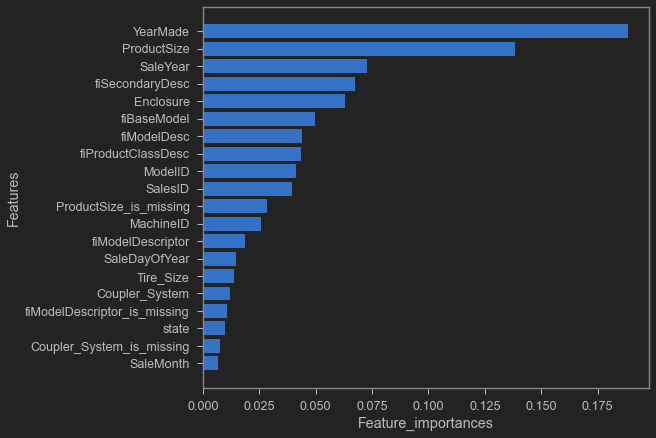

In [183]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [232]:
data_method_2 = list(zip(X_train.columns, ideal_model.feature_importances_))
data_method_2[:20]

[('SalesID', 0.039520051487730995),
 ('MachineID', 0.0256032894821463),
 ('ModelID', 0.04133955988498094),
 ('datasource', 0.002215278683797296),
 ('auctioneerID', 0.005378951407761214),
 ('YearMade', 0.18844412680911665),
 ('MachineHoursCurrentMeter', 0.004376630004614496),
 ('UsageBand', 0.0014868226294454505),
 ('fiModelDesc', 0.043823342271426195),
 ('fiBaseModel', 0.04973983681471556),
 ('fiSecondaryDesc', 0.06726650749587114),
 ('fiModelSeries', 0.004822022331003671),
 ('fiModelDescriptor', 0.018635258663935676),
 ('ProductSize', 0.13830812566640535),
 ('fiProductClassDesc', 0.04371321481154048),
 ('state', 0.009998476679695426),
 ('ProductGroup', 0.003952236231483032),
 ('ProductGroupDesc', 0.002745097454270309),
 ('Drive_System', 0.002186042891823594),
 ('Enclosure', 0.06305298134096736)]

In [242]:
df_method_2 = pd.DataFrame({"features": X_train.columns,
                       "feature_importances": ideal_model.feature_importances_}).sort_values("feature_importances", ascending=False).reset_index(drop=True)

df_method_2

,features,feature_importances
0,YearMade,0.188444
1,ProductSize,0.138308
2,SaleYear,0.072658
3,fiSecondaryDesc,0.067267
4,Enclosure,0.063053
...,...,...
96,fiBaseModel_is_missing,0.000000
97,fiProductClassDesc_is_missing,0.000000
98,state_is_missing,0.000000
99,ProductGroup_is_missing,0.000000


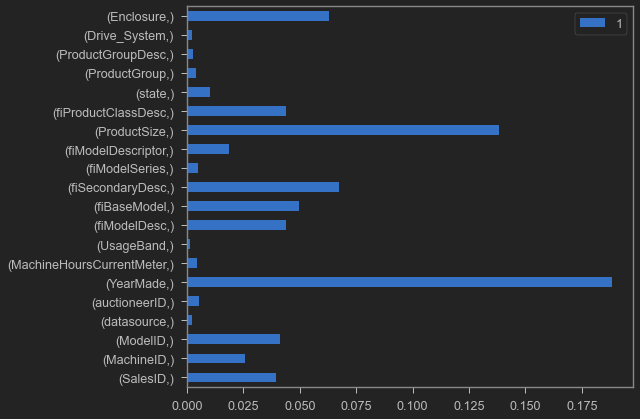

In [216]:
df_method_2.plot.barh()